In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ecommerce_data.csv')
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [3]:
transformed_df = pd.concat([df.drop('time_of_day', axis=1),pd.get_dummies(df['time_of_day'])],axis=1)
transformed_df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,user_action,0,1,2,3
0,1,0,0.657510,0,0,0,0,0,1
1,1,1,0.568571,0,1,0,0,1,0
2,1,0,0.042246,1,0,0,1,0,0
3,1,1,1.659793,1,2,0,1,0,0
4,0,1,2.014745,1,2,0,1,0,0


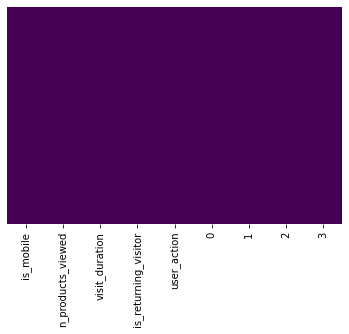

In [4]:
sns.heatmap(transformed_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [6]:
scaled_transformed_matrix = scaler.fit_transform(transformed_df)
scaled_transformed_matrix.shape

(500, 9)

In [7]:
X = np.delete(scaled_transformed_matrix, 4, axis=1)
Y = scaled_transformed_matrix[:, 4]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, test_size=0.25, 
                                                    random_state=101)